In [1]:
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pickle
import glob
import pickle
from scipy.linalg import pinv
import time
from tqdm.notebook import tqdm
import random
import itertools
import mlxtend
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import VarianceThreshold

In [2]:
os.chdir('..')

In [3]:
from wavelength_selection import *
from config import left_cut_helicoid, right_cut_helicoid

PATH:  /home/kevin/bll-piglets-helicoid


In [4]:
with open("helicoid_wl_opti_2024-02-07_23-44-27.pickle", "rb") as f:
    found_set = pickle.load(f)
    found_err = pickle.load(f)
    found_params = pickle.load(f)
    found_time = pickle.load(f)

In [5]:
found_time

[296.04894495010376,
 219.47169280052185,
 209.69218468666077,
 199.77678537368774,
 173.1540002822876,
 162.97452330589294,
 156.55754852294922,
 154.54752039909363,
 145.01685190200806,
 147.67032170295715,
 133.5363256931305,
 122.29321956634521,
 116.85444736480713,
 115.40726804733276,
 112.54820322990417,
 111.65021920204163,
 108.97794079780579,
 106.66468095779419,
 104.89730477333069,
 102.26111698150635,
 110.93514800071716,
 108.76931095123291,
 101.7046902179718,
 104.98054790496826,
 108.00973176956177,
 104.9607515335083,
 108.09891772270203,
 104.91942644119263,
 110.66365432739258]

In [6]:
np.sum(found_time)

3963.0432794094086

In [7]:
chosen_set = 28

In [8]:
found_set[chosen_set]

array([530.718, 539.449, 548.18 , 552.545, 567.825, 576.555, 585.286,
       598.383, 607.114, 624.575, 670.413, 676.961, 720.615, 731.529,
       735.894, 748.991])

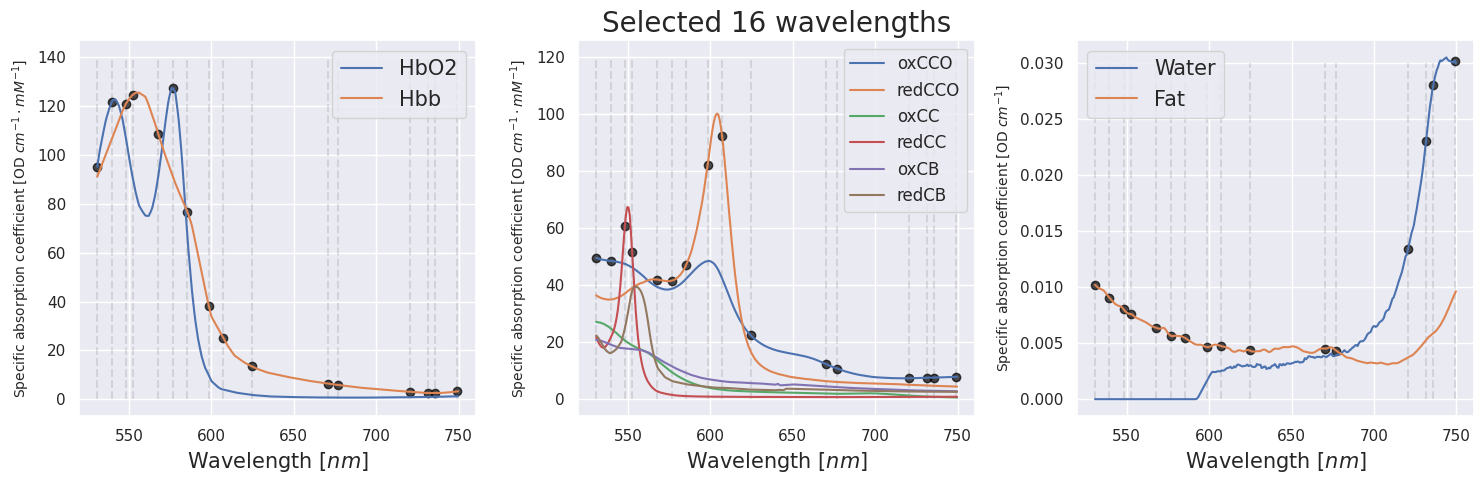

In [9]:
hdr_path = path+"/{}/raw.hdr".format("012-01")
img = open_image(hdr_path)
wavelength = np.array(img.metadata['wavelength']).astype(float)
molecules, x = read_molecules_creatis(left_cut_helicoid, right_cut_helicoid, x_waves=wavelength)
molecules_cyto, x_cyto = read_molecules_cytochrome_cb(left_cut, right_cut, wavelength)
assert((x_cyto == x).all())
y_hb_f, y_hbo2_f, y_coxa, y_creda, y_fat, y_water = molecules
y_c_oxy, y_c_red, y_b_oxy,y_b_red = molecules_cyto 
#y_water = y_water*1000
fig, axs = plt.subplots(1,3,figsize=(15,5))
axs[0].vlines(found_set[chosen_set], 0, 140, linestyle="dashed", alpha=0.1, color="black")
axs[1].vlines(found_set[chosen_set], 0, 120, linestyle="dashed", alpha=0.1, color="black")
axs[2].vlines(found_set[chosen_set], 0, 0.03, linestyle="dashed", alpha=0.1, color="black")
axs[0].plot(x,y_hbo2_f,label="HbO2")
axs[0].plot(x,y_hb_f,label="Hbb")
axs[1].plot(x,y_coxa,label="oxCCO")
axs[1].plot(x,y_creda,label="redCCO")
axs[1].plot(x,y_c_oxy,label="oxCC")
axs[1].plot(x,y_c_red,label="redCC")
axs[1].plot(x,y_b_oxy,label="oxCB")
axs[1].plot(x,y_b_red,label="redCB")
axs[2].plot(x,y_water, label="Water")
axs[2].plot(x,y_fat, label="Fat")

for i in range(len(found_set[chosen_set])):
    wl_index = np.where(x == found_set[chosen_set][i])
    axs[0].scatter(found_set[chosen_set][i], max(y_hb_f[wl_index], y_hbo2_f[wl_index]), color="black", alpha=0.7)
    axs[1].scatter(found_set[chosen_set][i], max(y_coxa[wl_index], y_creda[wl_index], y_c_oxy[wl_index], y_c_red[wl_index], y_b_oxy[wl_index], y_b_red[wl_index]), color="black", alpha=0.7)  
    axs[2].scatter(found_set[chosen_set][i], max(y_water[wl_index], y_fat[wl_index]), color="black", alpha=0.7)  
axs[0].legend(fontsize=15)
axs[1].legend(fontsize=12)
axs[2].legend(fontsize=15)
axs[1].set_title("Selected " + str(len(found_set[chosen_set])) + " wavelengths", fontsize=20)

axs[0].set_xlabel("Wavelength [$nm$]", fontsize=15)
axs[1].set_xlabel("Wavelength [$nm$]", fontsize=15)
axs[2].set_xlabel("Wavelength [$nm$]", fontsize=15)
axs[0].set_ylabel("Specific absorption coefficient [OD $cm^{-1} \cdot mM^{-1}$]",fontsize=10)
axs[1].set_ylabel("Specific absorption coefficient [OD $cm^{-1} \cdot mM^{-1}$]",fontsize=10)
axs[2].set_ylabel("Specific absorption coefficient [OD $cm^{-1}$]",fontsize=10)
fig.tight_layout()
fig.savefig("helicoid_selected_wavelengths")

In [113]:
found_err

[array([0.08615396, 0.0862852 , 0.08681366, 0.08702623, 0.08728295,
        0.08745228]),
 array([0.09005551, 0.09045549, 0.09058641, 0.09067699, 0.09069966]),
 array([0.08893622, 0.08896189, 0.08904236, 0.0890798 , 0.08910904]),
 array([0.08862627, 0.08867939, 0.08870602, 0.0887194 , 0.0887315 ]),
 array([0.08851424, 0.08852061, 0.0885399 , 0.08854902]),
 array([0.0884886 , 0.08850597, 0.08853358, 0.08859651]),
 array([0.08862466, 0.08883662, 0.08903076, 0.08904958]),
 array([0.09050003, 0.09096133, 0.0909932 , 0.0916334 ]),
 array([0.09141943, 0.09173468, 0.09182081, 0.09187558]),
 array([0.09281424, 0.09286949, 0.09294386]),
 array([0.09254983, 0.09312196, 0.0934263 ]),
 array([0.09355498, 0.09371317, 0.0937671 ]),
 array([0.09509884, 0.0952603 , 0.09550378]),
 array([0.09635026, 0.09695201, 0.09696128]),
 array([0.0991429 , 0.09946593, 0.09963217]),
 array([0.10266986, 0.10322202, 0.10336308]),
 array([0.10672103, 0.10818209]),
 array([0.10995044, 0.11048128]),
 array([0.11395115, 

In [151]:
current_len

0

76


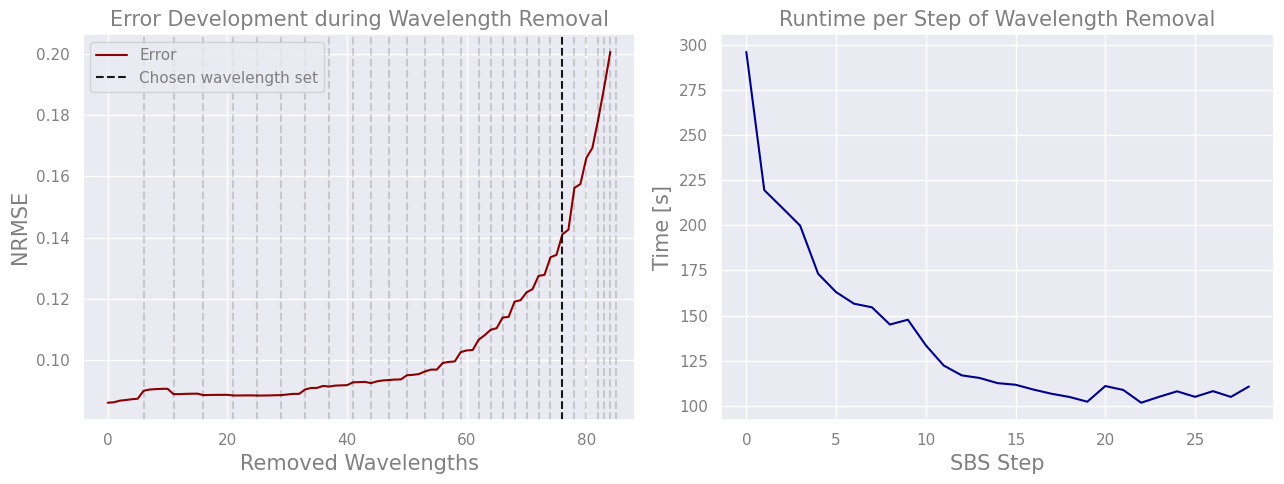

In [152]:
fig,axs = plt.subplots(1,2,figsize=(13,5))
current_len = 0
axs[0].plot(np.concatenate(found_err), color="darkred", label="Error")
for i, errs in enumerate(found_err):
    current_len += len(errs)
    if i == chosen_set:
        print(current_len)
        axs[0].axvline(current_len, color="black", alpha=0.9, linestyle="dashed", label="Chosen wavelength set")
    else:
        axs[0].axvline(current_len, color="black", alpha=0.15, linestyle="dashed")
axs[0].legend()
axs[0].set_xlabel("Removed Wavelengths", fontsize=15)
axs[0].set_ylabel("NRMSE", fontsize=15)
axs[0].set_title("Error Development during Wavelength Removal", fontsize=15)

current_len = 0
axs[1].plot(found_time, color="darkblue")
axs[1].set_xlabel("SBS Step", fontsize=15)
axs[1].set_ylabel("Time [s]", fontsize=15)
axs[1].set_title("Runtime per Step of Wavelength Removal", fontsize=15)

plt.tight_layout()
fig.savefig("wlopti/error_development_wavelength_removal")

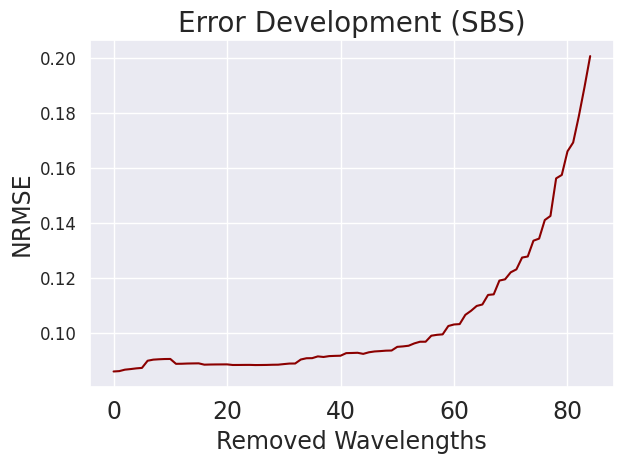

In [27]:
plt.figure()
current_len = 0
plt.plot(np.concatenate(found_err), color="darkred", label="Error")
# for i, errs in enumerate(found_err):
#     current_len += len(errs)
#     if i == chosen_set:
#         print(current_len)
#         plt.axvline(current_len, color="black", alpha=0.9, linestyle="dashed", label="Chosen wavelength set")
#     else:
#         plt.axvline(current_len, color="black", alpha=0.15, linestyle="dashed")
plt.xlabel("Removed Wavelengths", fontsize=17)
plt.ylabel("NRMSE", fontsize=17)
plt.title("Error Development (SBS)", fontsize=20)

plt.xticks(fontsize=17)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("wlopti/error_development_wavelength_removal_poster")

In [178]:
found_set[chosen_set]

array([530.718, 539.449, 548.18 , 552.545, 567.825, 576.555, 585.286,
       598.383, 607.114, 624.575, 670.413, 676.961, 720.615, 731.529,
       735.894, 748.991])

In [167]:
err, params_found_patients, params_found_GT_patients = helicoid_run_with_wl(found_set[chosen_set], coarseness=1, use_parallel_lsq=True)

265440


265440it [01:51, 2372.65it/s]


190619


190619it [01:22, 2310.38it/s]


113751


113751it [00:46, 2422.63it/s]


120888


120888it [00:49, 2421.91it/s]


124740


124740it [00:52, 2375.99it/s]


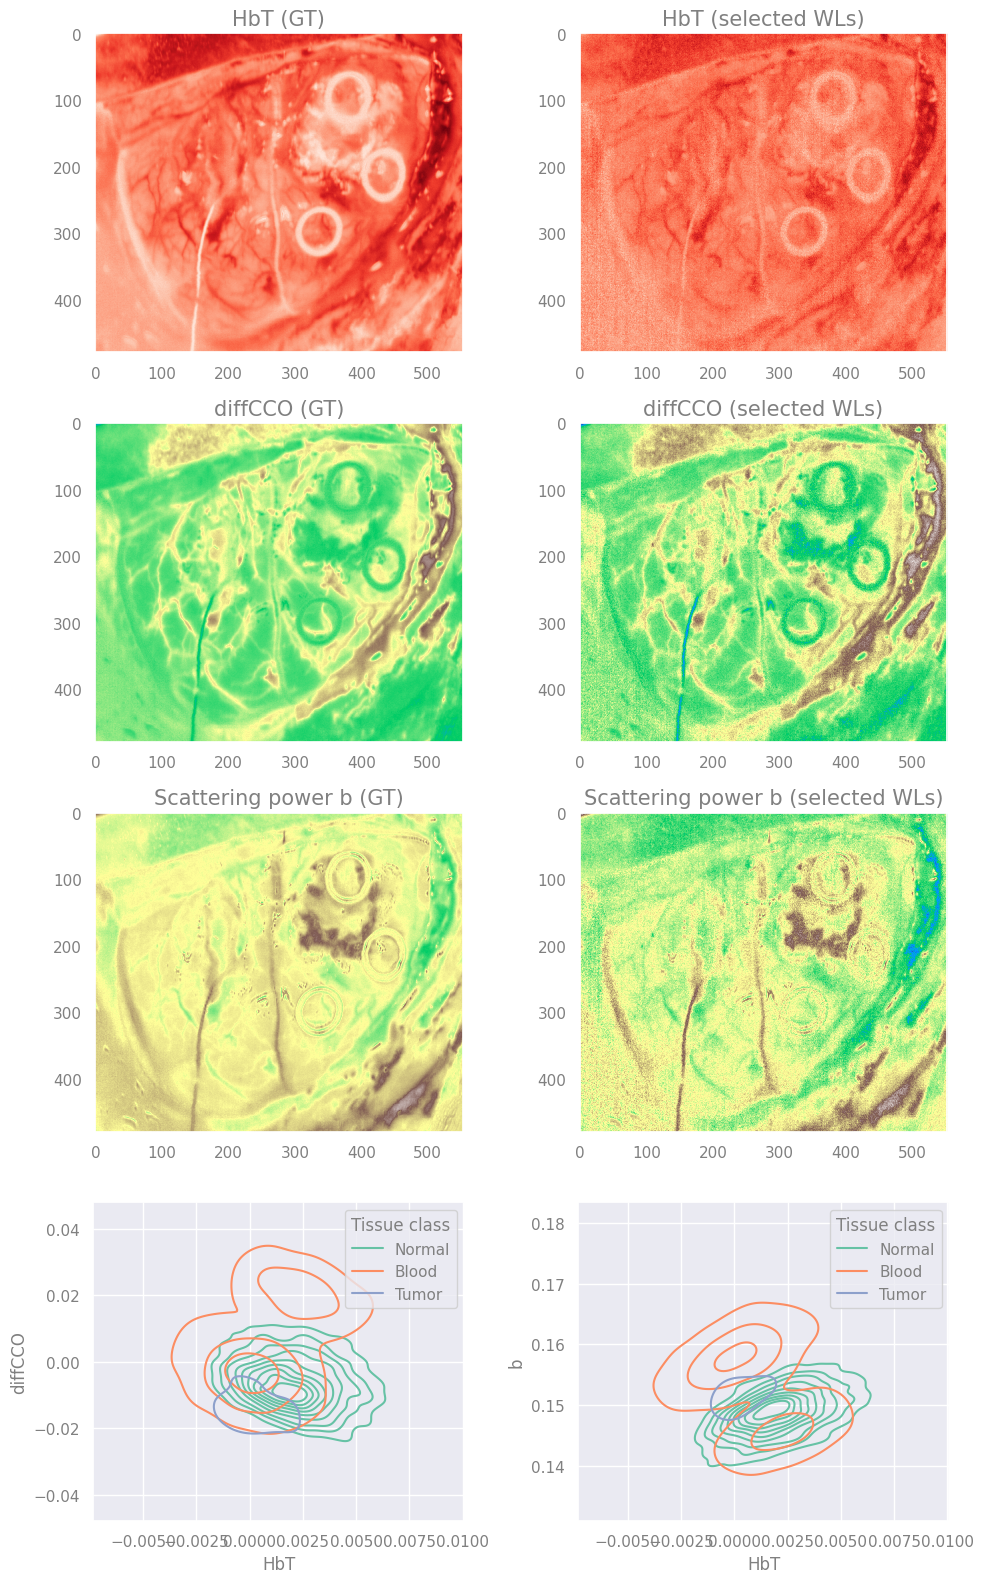

In [176]:
patient = 0
patient_arr = params_found_patients[patient]
patient_arr_GT = params_found_GT_patients[patient]
#plt.figure()
#plt.grid(None)
fig, axs = plt.subplots(4,2,figsize=(10,16))
hbt_GT = patient_arr_GT[:,:,0] + patient_arr_GT[:,:,1]
hbt = patient_arr[:,:,0] + patient_arr[:,:,1]
hbt_max = np.max([np.max(hbt), np.max(hbt_GT)])
hbt_min = np.min([np.min(hbt), np.min(hbt_GT)])
axs[0,0].imshow(hbt_GT,cmap="Reds")
axs[0,1].imshow(hbt, cmap="Reds")
#axs[1].imshow(patient_arr[:,:,2] - patient_arr[:,:,3])
axs[0,0].grid(None)
axs[0,1].grid(None)
axs[0,0].set_title("HbT (GT)",fontsize=15)
axs[0,1].set_title("HbT (selected WLs)",fontsize=15)

#fig, axs = plt.subplots(1,2,figsize=(10,5))
hbt_GT = patient_arr_GT[:,:,2] - patient_arr_GT[:,:,3]
hbt = patient_arr[:,:,2] - patient_arr[:,:,3]
hbt_max = np.max([np.max(hbt), np.max(hbt_GT)])
hbt_min = np.min([np.min(hbt), np.min(hbt_GT)])
axs[1,0].imshow(hbt_GT, vmin=hbt_min, vmax=hbt_max)
axs[1,1].imshow(hbt, vmin=hbt_min, vmax=hbt_max)
#axs[1].imshow(patient_arr[:,:,2] - patient_arr[:,:,3])
axs[1,0].grid(None)
axs[1,1].grid(None)
axs[1,0].set_title("diffCCO (GT)",fontsize=15)
axs[1,1].set_title("diffCCO (selected WLs)",fontsize=15)

#fig, axs = plt.subplots(1,2,figsize=(10,5))
hbt_GT = patient_arr_GT[:,:,11]
hbt = patient_arr[:,:,11]
hbt_max = np.max([np.max(hbt), np.max(hbt_GT)])
hbt_min = np.min([np.min(hbt), np.min(hbt_GT)])
im = axs[2,0].imshow(hbt_GT, vmin=hbt_min, vmax=hbt_max)
axs[2,1].imshow(hbt, vmin=hbt_min, vmax=hbt_max)
#axs[1].imshow(patient_arr[:,:,2] - patient_arr[:,:,3])
axs[2,0].grid(None)
axs[2,1].grid(None)
axs[2,0].set_title("Scattering power b (GT)",fontsize=15)
axs[2,1].set_title("Scattering power b (selected WLs)",fontsize=15)

#fig, axs = plt.subplots(1,2,figsize=(12,5))
patient_names = ["008-02", "025-02", "016-04", "016-05", "020-01"]
patient = patient_names[patient]

qoi_names = ["HbT","diffCCO","b", "Tissue class"]
#qoi_names = ["HbT", "diffCCO", "HbDiff", "CCO", "CC", "diffCC", "CB", "diffCB", "Water", "Fat", "b", "Tissue class"]
tissue_classes_index = [0,1,2]
tissue_classes_names = ["Normal", "Blood", "Tumor"]
coef_list_matrix = None
hdr_path = path_helicoid+"/{}/raw.hdr".format(patient)
img = open_image(hdr_path)
wavelength = np.array(img.metadata['wavelength']).astype(float)

rbg_path = path_helicoid+"/{}/image.jpg".format(patient)
rbg = Image.open(rbg_path)

white_path = path_helicoid+"/{}/whiteReference.hdr".format(patient)
white = open_image(white_path)
white = white.load()

dark_path = path_helicoid+"/{}/darkReference.hdr".format(patient)

dark = open_image(dark_path)
dark = dark.load()

white_full = np.tile(white, (img.shape[0],1,1))
dark_full = np.tile(dark, (img.shape[0],1,1))

gt_path = path_helicoid+"/{}/gtMap.hdr".format(patient)
gt = open_image(gt_path)
gt = gt.load()
tumor = (gt==2)
normal = (gt==1)
blood = (gt==3)

(x_normal,y_normal) = np.where((np.squeeze(gt)==1))
(x_tumor,y_tumor) = np.where((np.squeeze(gt)==2))
(x_blood,y_blood) =  np.where((np.squeeze(gt)==3))

mask1 = np.ma.masked_where(tumor.astype(int) == 0, tumor.astype(int))
mask2 = np.ma.masked_where(normal.astype(int) == 0, normal.astype(int))
mask3 = np.ma.masked_where(blood.astype(int) == 0, blood.astype(int))

img_normalized = ((img.load() - dark_full) / (white_full - dark_full))
#img_normalized = ((img.load() - dark_full) / (white_full - dark_full))+0.1
img_normalized[img_normalized <= 0] = 10**-2

img_RGB = np.stack((img_normalized[:,:,int(img.metadata['default bands'][2])],img_normalized[:,:,int(img.metadata['default bands'][1])],img_normalized[:,:,int(img.metadata['default bands'][0])]), axis=2)

tumor = (gt==2).flatten()
normal = (gt==1).flatten()
blood = (gt==3).flatten()

tissue_classes = [normal, blood, tumor]

coef_list_flat = patient_arr.reshape(-1, patient_arr.shape[-1])
scattering_coef_list_flat = patient_arr[:,:,10:].reshape(-1, patient_arr[:,:,10:].shape[-1])   
for k, tissue_class in enumerate(tissue_classes):
    hbt = coef_list_flat[tissue_class,0] + coef_list_flat[tissue_class,1]
    hbdiff = coef_list_flat[tissue_class,0] - coef_list_flat[tissue_class,1]

    cco = coef_list_flat[tissue_class,2] + coef_list_flat[tissue_class,3]
    diffcco = coef_list_flat[tissue_class,2] - coef_list_flat[tissue_class,3]

    cc = coef_list_flat[tissue_class,4] + coef_list_flat[tissue_class,5]
    diffcc = coef_list_flat[tissue_class,4] - coef_list_flat[tissue_class,5]

    cb = coef_list_flat[tissue_class,6] + coef_list_flat[tissue_class,7]
    diffcb = coef_list_flat[tissue_class,6] - coef_list_flat[tissue_class,7]
    
    water = coef_list_flat[tissue_class,7]
    fat = coef_list_flat[tissue_class,8]
    b = scattering_coef_list_flat[tissue_class,1]
    #qoi = np.array([hbt,hbdiff,cco,diffcco,cc,diffcc,cb,diffcb,water, fat, b]).T
    qoi = np.array([hbt,diffcco,b]).T
    #qoi = np.array([hbt,hbdiff,cco,diffcco,b]).T
    qoi = np.concatenate((qoi, np.full((qoi.shape[0],1),k)), axis=1)
    #qoi = np.concatenate((qoi, np.full((qoi.shape[0],1),i)), axis=1)
    
    if coef_list_matrix is None:
        coef_list_matrix = qoi
    else:
        coef_list_matrix = np.concatenate((coef_list_matrix,qoi),axis=0)

df = pd.DataFrame(coef_list_matrix, columns=qoi_names)
df["Tissue class"] = df["Tissue class"].replace({tissue_classes_index[0]: tissue_classes_names[0],tissue_classes_index[1]:tissue_classes_names[1],tissue_classes_index[2]:tissue_classes_names[2] })

# rgb_ax = ax2[i,0]
# rgb_ax.imshow(img_RGB)
# rgb_ax.axis(False)
# rgb_ax.set_title(patient,fontsize=30)
# rgb_ax.imshow(mask1, cmap=cm.tab10)
# rgb_ax.imshow(mask2, cmap=cm.Dark2)
# rgb_ax.imshow(mask3, cmap=cm.get_cmap('spring_r'))
# rgb_ax.plot(reference_point[1], reference_point[0], "rx", markersize=20, markeredgewidth=6, color="orange")
sns.kdeplot(data=df, x="HbT", y="diffCCO", hue="Tissue class", palette="Set2",ax=axs[3,0])
#sns.kdeplot(data=df, x="b", y="diffCCO", hue="Tissue class", palette="Set2", ax=ax2[i,2])
sns.kdeplot(data=df, x="HbT", y="b", hue="Tissue class", palette="Set2", ax=axs[3,1])

plt.tight_layout()
fig.savefig("wlopti/" + patient + "_wlselection")

In [78]:
import seaborn as sns
import pandas as pd

In [166]:
patient_names = ["008-02", "025-02", "016-04", "016-05", "020-01"]
patient = patient_names[patient]

qoi_names = ["HbT","diffCCO","b", "Tissue class"]
#qoi_names = ["HbT", "diffCCO", "HbDiff", "CCO", "CC", "diffCC", "CB", "diffCB", "Water", "Fat", "b", "Tissue class"]
tissue_classes_index = [0,1,2]
tissue_classes_names = ["Normal", "Blood", "Tumor"]
coef_list_matrix = None
hdr_path = path_helicoid+"/{}/raw.hdr".format(patient)
img = open_image(hdr_path)
wavelength = np.array(img.metadata['wavelength']).astype(float)

rbg_path = path_helicoid+"/{}/image.jpg".format(patient)
rbg = Image.open(rbg_path)

white_path = path_helicoid+"/{}/whiteReference.hdr".format(patient)
white = open_image(white_path)
white = white.load()

dark_path = path_helicoid+"/{}/darkReference.hdr".format(patient)

dark = open_image(dark_path)
dark = dark.load()

white_full = np.tile(white, (img.shape[0],1,1))
dark_full = np.tile(dark, (img.shape[0],1,1))

gt_path = path_helicoid+"/{}/gtMap.hdr".format(patient)
gt = open_image(gt_path)
gt = gt.load()
tumor = (gt==2)
normal = (gt==1)
blood = (gt==3)

(x_normal,y_normal) = np.where((np.squeeze(gt)==1))
(x_tumor,y_tumor) = np.where((np.squeeze(gt)==2))
(x_blood,y_blood) =  np.where((np.squeeze(gt)==3))

mask1 = np.ma.masked_where(tumor.astype(int) == 0, tumor.astype(int))
mask2 = np.ma.masked_where(normal.astype(int) == 0, normal.astype(int))
mask3 = np.ma.masked_where(blood.astype(int) == 0, blood.astype(int))

img_normalized = ((img.load() - dark_full) / (white_full - dark_full))
#img_normalized = ((img.load() - dark_full) / (white_full - dark_full))+0.1
img_normalized[img_normalized <= 0] = 10**-2

img_RGB = np.stack((img_normalized[:,:,int(img.metadata['default bands'][2])],img_normalized[:,:,int(img.metadata['default bands'][1])],img_normalized[:,:,int(img.metadata['default bands'][0])]), axis=2)

tumor = (gt==2).flatten()
normal = (gt==1).flatten()
blood = (gt==3).flatten()

tissue_classes = [normal, blood, tumor]

coef_list_flat = patient_arr.reshape(-1, patient_arr.shape[-1])
scattering_coef_list_flat = patient_arr[:,:,10:].reshape(-1, patient_arr[:,:,10:].shape[-1])   
for k, tissue_class in enumerate(tissue_classes):
    hbt = coef_list_flat[tissue_class,0] + coef_list_flat[tissue_class,1]
    hbdiff = coef_list_flat[tissue_class,0] - coef_list_flat[tissue_class,1]

    cco = coef_list_flat[tissue_class,2] + coef_list_flat[tissue_class,3]
    diffcco = coef_list_flat[tissue_class,2] - coef_list_flat[tissue_class,3]

    cc = coef_list_flat[tissue_class,4] + coef_list_flat[tissue_class,5]
    diffcc = coef_list_flat[tissue_class,4] - coef_list_flat[tissue_class,5]

    cb = coef_list_flat[tissue_class,6] + coef_list_flat[tissue_class,7]
    diffcb = coef_list_flat[tissue_class,6] - coef_list_flat[tissue_class,7]
    
    water = coef_list_flat[tissue_class,7]
    fat = coef_list_flat[tissue_class,8]
    b = scattering_coef_list_flat[tissue_class,1]
    #qoi = np.array([hbt,hbdiff,cco,diffcco,cc,diffcc,cb,diffcb,water, fat, b]).T
    qoi = np.array([hbt,diffcco,b]).T
    #qoi = np.array([hbt,hbdiff,cco,diffcco,b]).T
    qoi = np.concatenate((qoi, np.full((qoi.shape[0],1),k)), axis=1)
    #qoi = np.concatenate((qoi, np.full((qoi.shape[0],1),i)), axis=1)
    
    if coef_list_matrix is None:
        coef_list_matrix = qoi
    else:
        coef_list_matrix = np.concatenate((coef_list_matrix,qoi),axis=0)

df = pd.DataFrame(coef_list_matrix, columns=qoi_names)
df["Tissue class"] = df["Tissue class"].replace({tissue_classes_index[0]: tissue_classes_names[0],tissue_classes_index[1]:tissue_classes_names[1],tissue_classes_index[2]:tissue_classes_names[2] })

# rgb_ax = ax2[i,0]
# rgb_ax.imshow(img_RGB)
# rgb_ax.axis(False)
# rgb_ax.set_title(patient,fontsize=30)
# rgb_ax.imshow(mask1, cmap=cm.tab10)
# rgb_ax.imshow(mask2, cmap=cm.Dark2)
# rgb_ax.imshow(mask3, cmap=cm.get_cmap('spring_r'))
# rgb_ax.plot(reference_point[1], reference_point[0], "rx", markersize=20, markeredgewidth=6, color="orange")
plt.figure()
sns.kdeplot(data=df, x="HbT", y="diffCCO", hue="Tissue class", palette="Set2")
#sns.kdeplot(data=df, x="b", y="diffCCO", hue="Tissue class", palette="Set2", ax=ax2[i,2])
plt.figure()
sns.kdeplot(data=df, x="HbT", y="b", hue="Tissue class", palette="Set2")

TypeError: list indices must be integers or slices, not str